# Image Classifier

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
import cv2

In [4]:
import imghdr #Checks file extension

In [5]:
data_dir="D:\data"

In [6]:
image_extensions=['jpeg','jpg','bmp','png']

In [7]:
os.listdir(data_dir)

['happy', 'sad']

In [8]:
for image_class in os.listdir(data_dir):
    for images in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,images)
        print(image_path)
        try:
            img=cv2.imread(image_path)
            x=imghdr.what(image_path) 
            if x not in image_extensions:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image{}".format(image_path))

D:\data\happy\05-12-21-happy-people.jpg
D:\data\happy\1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
D:\data\happy\170404-happy-workers-feature.jpg
D:\data\happy\1961996_stock-photo-group-of-happy-people.jpg
D:\data\happy\20150413185238-secrets-happy-entrepreneurs-woman-gratitude-r.jpeg
D:\data\happy\343515-worldhappinessreport1440.jpg
D:\data\happy\35438_hd.jpg
D:\data\happy\35443_hd.jpg
D:\data\happy\360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg
D:\data\happy\360_F_324810244_4pLFdBBn9Cc7nywaugt84lrANmmgwDUr.jpg
D:\data\happy\360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
D:\data\happy\360_F_582239379_7n6b6kBXogmFRvSz5Ncgr7aQrZBEcO1p.jpg
D:\data\happy\56f455011e0000b300705475.jpeg
D:\data\happy\7-principles-of-successful-and-happy-people.png
D:\data\happy\7VR73K6EP5ETVEOUFANWBUYJEQ.jpg
D:\data\happy\89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809a.png
D:\data\happy\960x0.jpg
D:\data\happy\A_Sep20_14_1189155141.jpg
D:\data\happy\compassion.jpg
D:\data\ha

D:\data\sad\photo-1511297968426-a869b61af3da.jpeg
D:\data\sad\photo-1535890696255-dd5bcd79e6df.jpeg
D:\data\sad\png-clipart-sadness-person-depression-bored-s-hand-fictional.png
D:\data\sad\pngtree-woman-looking-sad-in-black-and-white-picture-image_2.jpg
D:\data\sad\pngtree-woman-looking-sad-in-the-rain-picture-image_2771069.jpg
D:\data\sad\pngtree-young-woman-with-a-sad-face-picture-image_2770999.jpg
D:\data\sad\portrait-sad-people-young-40909457.jpg
D:\data\sad\premium_photo-1664644293594-1863bd2a7637.jpeg
D:\data\sad\premium_photo-1682098310774-a2e67d8b47e4.jpeg
D:\data\sad\sad-depressed-man.jpg
D:\data\sad\sad-glance-mm-nisan-kandilcioglu.jpg
D:\data\sad\Sad-man-being-consoled-by-friends-in-group-therapy.jpg
D:\data\sad\sad-people-vector-26812552.jpg
D:\data\sad\sad-thumb.jpg
D:\data\sad\sad-wise-woman-at-window.jpg
D:\data\sad\sadness.jpg
D:\data\sad\sadpersonas-risks-symptoms-suicide.jpg
D:\data\sad\screen-shot-2014-07-31-at-6-09-12-pm.png
D:\data\sad\silhouettes-of-a-sad-man-with

In [9]:
import numpy as np

In [10]:
data=tf.keras.utils.image_dataset_from_directory('D:\data')

Found 263 files belonging to 2 classes.


In [11]:
data_iterator=data.as_numpy_iterator()

In [12]:
data_iterator

In [13]:
batch=data_iterator.next()

In [14]:
#Image as numpy arrays
batch[0].min()

0.0

In [15]:
batch[1]

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

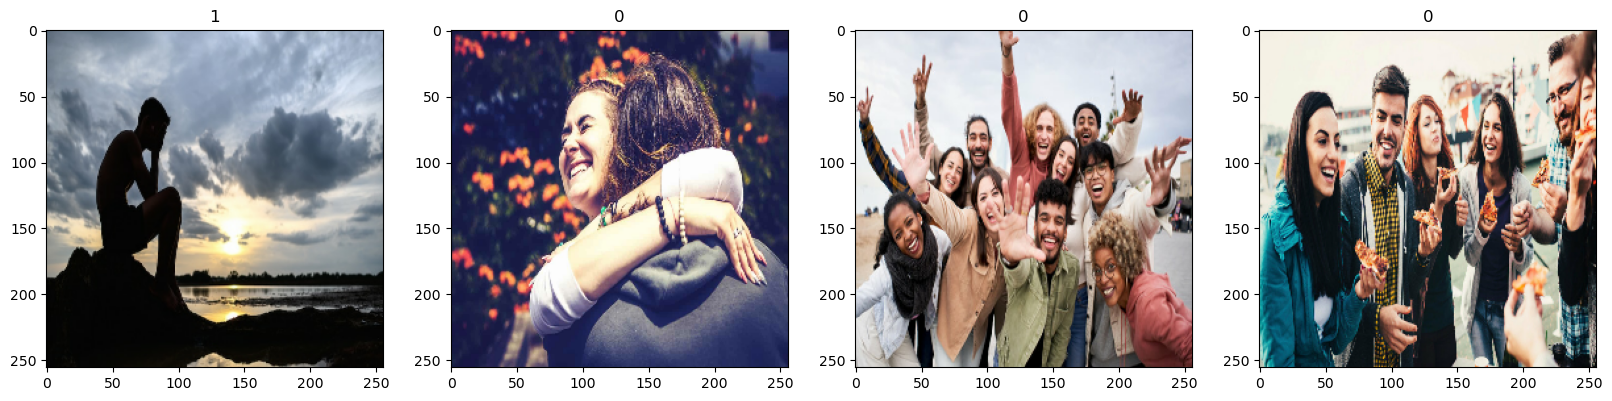

In [16]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
#Preprocess data

In [18]:
batch[0].max()

255.0

In [19]:
data=data.map(lambda x,y: (x/255,y))

In [20]:
data

<MapDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [21]:
scaled_iterator=data.as_numpy_iterator()

In [22]:
batch=scaled_iterator.next()

In [23]:
batch[0].min()

0.0

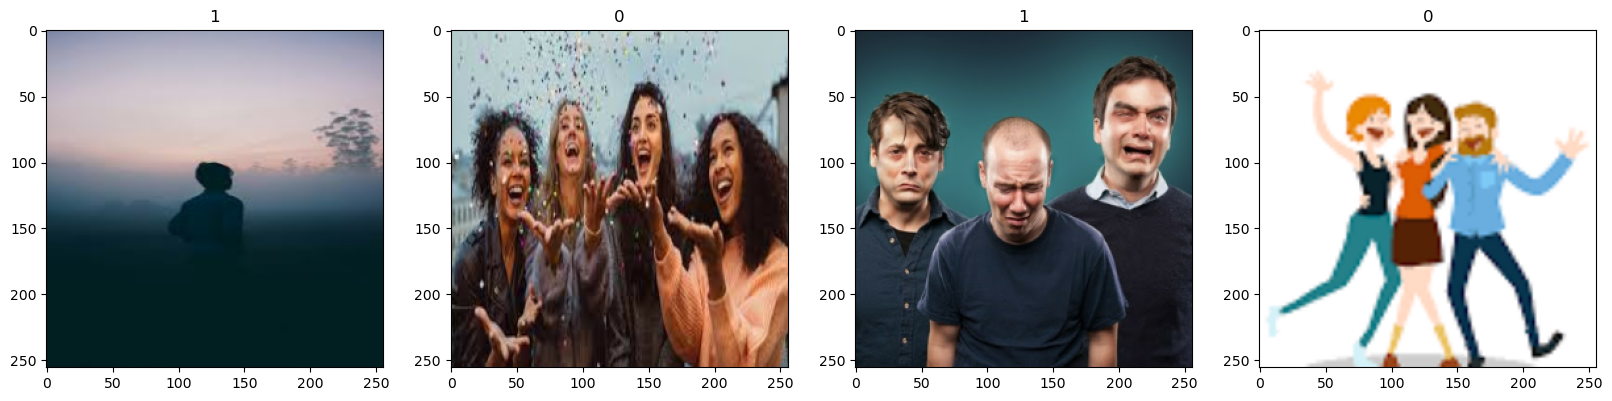

In [24]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [25]:
len(data)

9

In [26]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)+1
test_size=int(len(data)*0.1)+1

In [27]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

# Model building

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [30]:
model= Sequential()

In [31]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [34]:
hist=model.fit(train,epochs=15,validation_data=val)

Epoch 1/15
6/6 [==============================] - 5s 266ms/step - loss: 1.1598 - accuracy: 0.5156 - val_loss: 0.6095 - val_accuracy: 0.6250
Epoch 2/15
6/6 [==============================] - 2s 264ms/step - loss: 0.5887 - accuracy: 0.7031 - val_loss: 0.4910 - val_accuracy: 0.7656
Epoch 3/15
6/6 [==============================] - 2s 269ms/step - loss: 0.4952 - accuracy: 0.7917 - val_loss: 0.4556 - val_accuracy: 0.7812
Epoch 4/15
6/6 [==============================] - 3s 284ms/step - loss: 0.4569 - accuracy: 0.7812 - val_loss: 0.3730 - val_accuracy: 0.9062
Epoch 5/15
6/6 [==============================] - 2s 271ms/step - loss: 0.3675 - accuracy: 0.8385 - val_loss: 0.4069 - val_accuracy: 0.7656
Epoch 6/15
6/6 [==============================] - 2s 269ms/step - loss: 0.3413 - accuracy: 0.8125 - val_loss: 0.2210 - val_accuracy: 0.9062
Epoch 7/15
6/6 [==============================] - 2s 271ms/step - loss: 0.2048 - accuracy: 0.9375 - val_loss: 0.1307 - val_accuracy: 0.9375
Epoch 8/15
6/6 [====

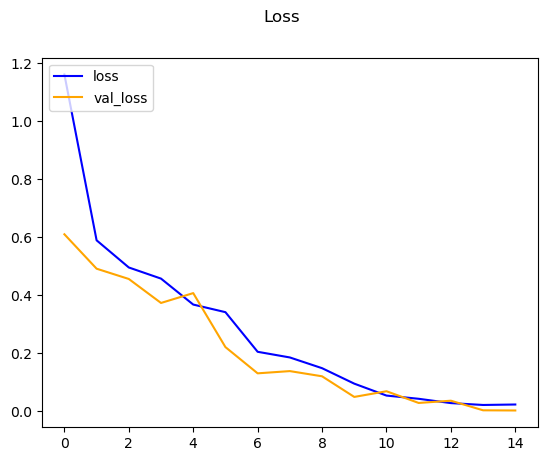

In [35]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss')
plt.legend(loc='upper left')
plt.show()

# Evaluation

In [36]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [37]:
preci=Precision()
rec=Recall()
acc=BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    X,y=batch
    y_pred=model.predict(X)
    preci.update_state(y,y_pred)
    rec.update_state(y,y_pred)
    acc.update_state(y,y_pred)

In [39]:
print(preci.result().numpy())

1.0


In [40]:
print(rec.result().numpy())

1.0


In [41]:
print(acc.result().numpy())

1.0


# Testing

In [42]:
import cv2

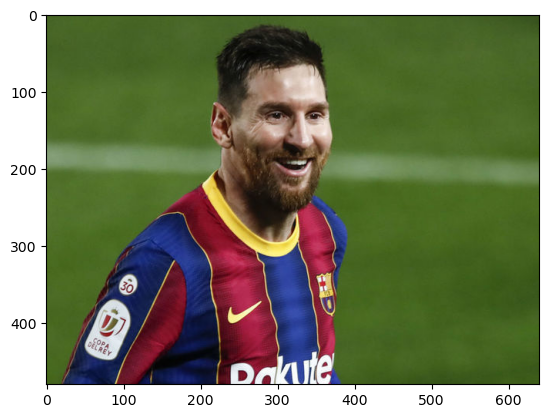

In [43]:
img=cv2.imread(r'C:\Users\my pc\Desktop\messi_happy.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

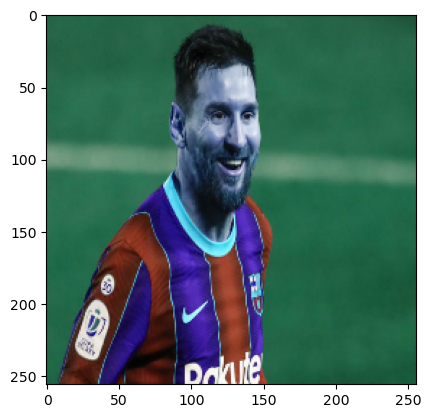

In [44]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))

In [45]:
y_pred=model.predict(np.expand_dims(resize/255,0))

In [46]:
y_pred

array([[0.00014154]], dtype=float32)

In [47]:
if y_pred > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
